In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Downloads/walmart_sales_data.csv")
print(df.head())

         Date     Product         Category             Store  Quantity  Price  \
0  2023-01-01       Mouse          Gadgets   Walmart Store 8         7   1807   
1  2023-01-01  Headphones  Home Appliances   Walmart Store 8         3    944   
2  2023-01-02          TV  Home Appliances  Walmart Store 19        16    282   
3  2023-01-04  Headphones      Electronics   Walmart Store 9        17   1296   
4  2023-01-05       Phone  Home Appliances   Walmart Store 8         9    958   

   Total Revenue  
0          12649  
1           2832  
2           4512  
3          22032  
4           8622  


In [4]:
print(df.isnull().sum())

Date             0
Product          0
Category         0
Store            0
Quantity         0
Price            0
Total Revenue    0
dtype: int64


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df['Total Revenue'] = df['Quantity'] * df['Price']

In [7]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_revenue = df.groupby('Month')['Total Revenue'].sum()

In [8]:
top_products = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False).head(10)

In [9]:
top_stores = df.groupby('Store')['Total Revenue'].sum().sort_values(ascending=False).head(10)

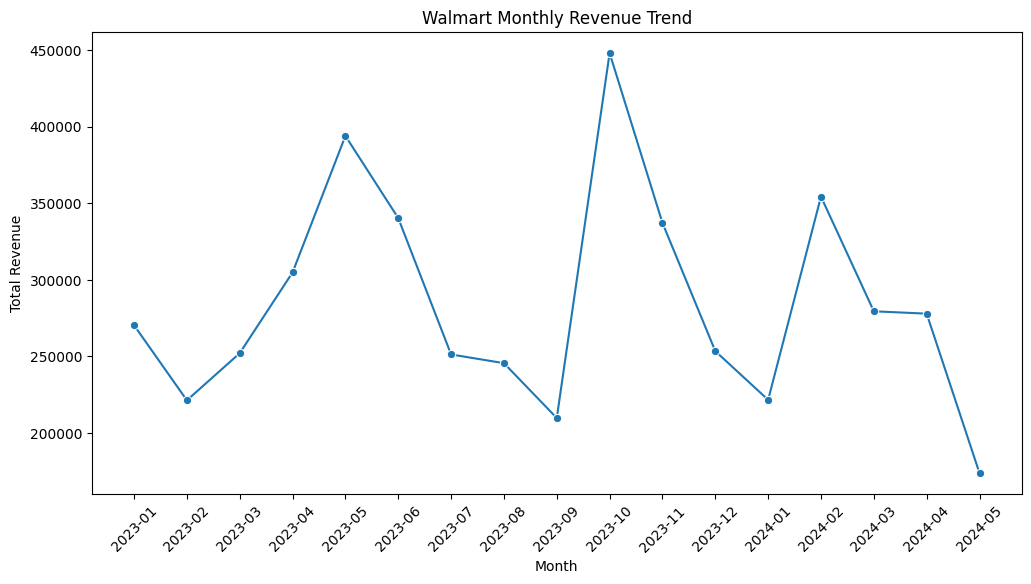

In [10]:
plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_revenue.index.astype(str), y=monthly_revenue.values, marker='o')
plt.xticks(rotation=45)
plt.title("Walmart Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.show()

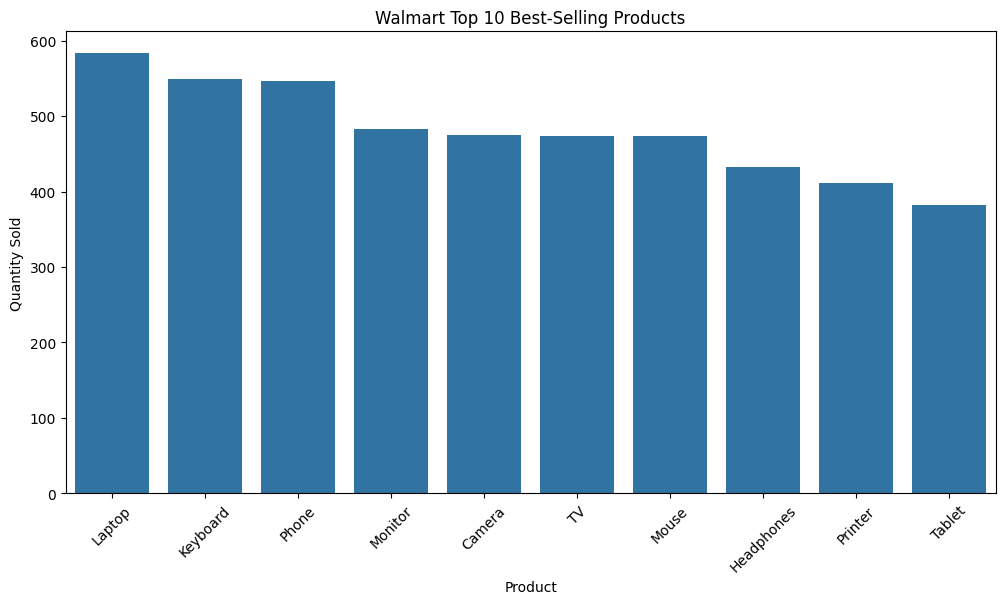

In [11]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.xticks(rotation=45)
plt.title("Walmart Top 10 Best-Selling Products")
plt.xlabel("Product")
plt.ylabel("Quantity Sold")
plt.show()

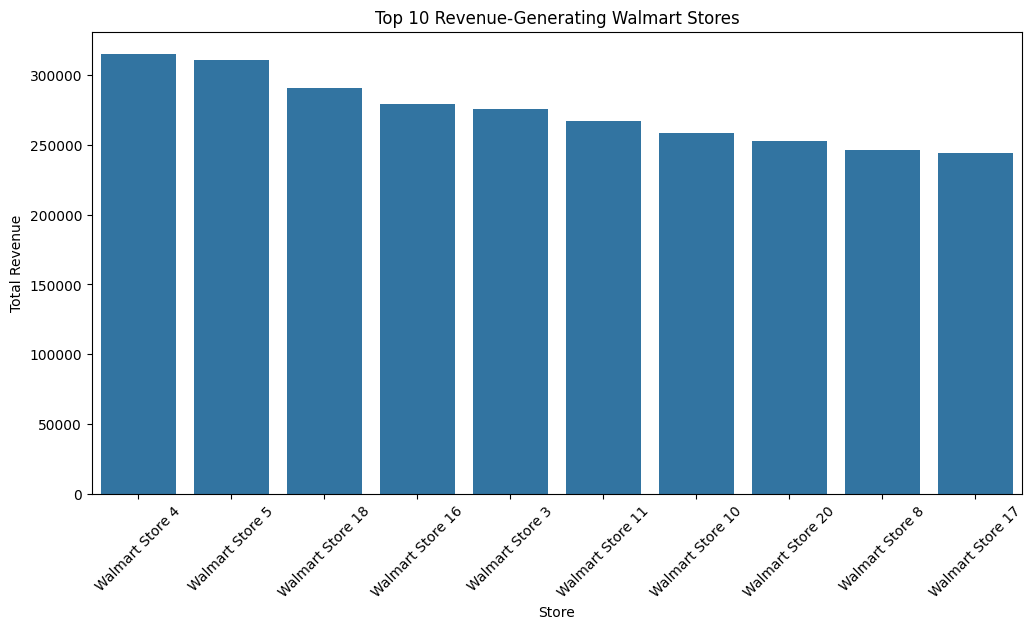

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_stores.index, y=top_stores.values)
plt.xticks(rotation=45)
plt.title("Top 10 Revenue-Generating Walmart Stores")
plt.xlabel("Store")
plt.ylabel("Total Revenue")
plt.show()